# Permission Classification Analysis

This notebook analyzes the distribution of permission classifications across serverless applications.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# IEEE conference template font sizes (larger for readability)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 18

# Load permission classification results
# Generated by: python tools/permission_classifier/permission_classifier.py --apps-json apps.json
df = pd.read_csv('../../output/results/permission_classifications/permission_classifications.csv')
print(f"Total applications analyzed: {len(df)}")
print(f"Total permissions across all apps: {df['total_permissions'].sum()}")
df.head()

## 1. Overall Classification Distribution

Distribution of permissions across all classification categories.

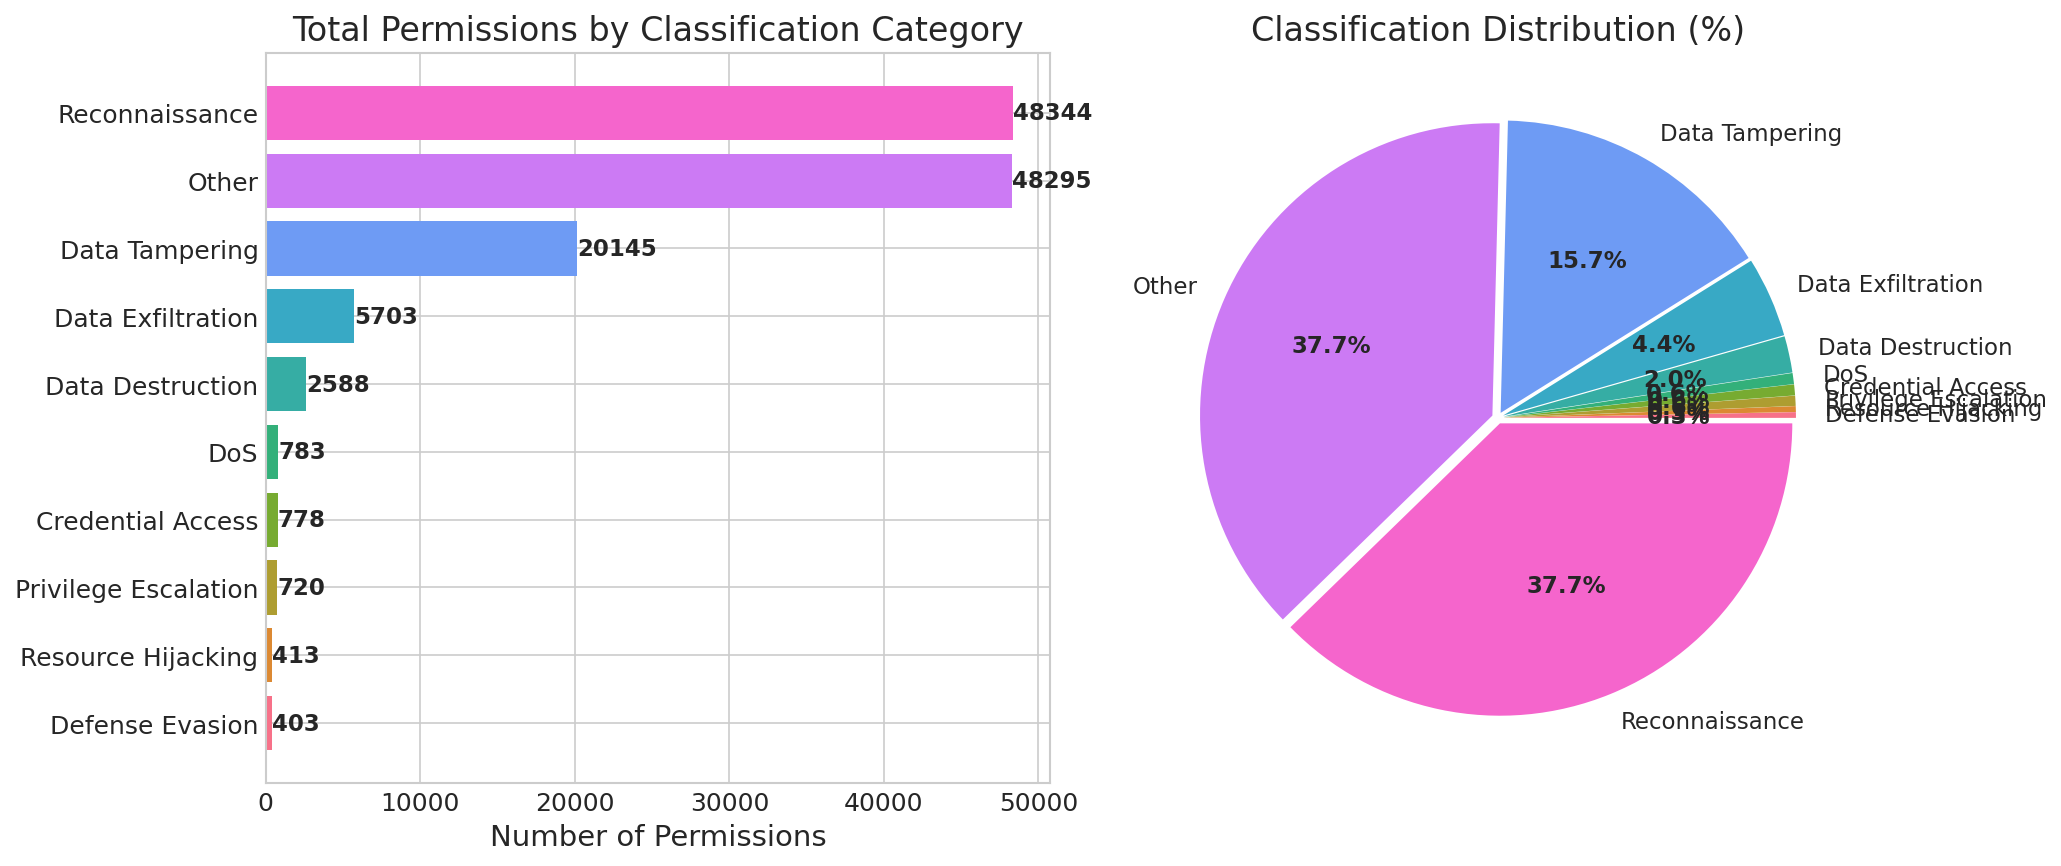


Classification Summary:
Reconnaissance          48344
Other                   48295
Data Tampering          20145
Data Exfiltration        5703
Data Destruction         2588
DoS                       783
Credential Access         778
Privilege Escalation      720
Resource Hijacking        413
Defense Evasion           403
dtype: int64


In [2]:
# Define classification columns
classification_cols = ['Reconnaissance', 'Data Exfiltration', 'Credential Access', 
                       'Privilege Escalation', 'Data Tampering', 'Data Destruction', 
                       'DoS', 'Resource Hijacking', 'Defense Evasion', 'Other']

# Sum of each classification
classification_totals = df[classification_cols].sum().sort_values(ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
colors = sns.color_palette('husl', len(classification_cols))
bars = axes[0].barh(classification_totals.index, classification_totals.values, color=colors)
axes[0].set_xlabel('Number of Permissions', fontsize=14)
axes[0].set_title('Total Permissions by Classification Category', fontsize=16)
axes[0].tick_params(axis='both', labelsize=12)
for i, v in enumerate(classification_totals.values):
    axes[0].text(v + 10, i, str(v), va='center', fontsize=11, fontweight='bold')

# Pie chart
explode = [0.02] * len(classification_totals)
wedges, texts, autotexts = axes[1].pie(classification_totals.values, labels=classification_totals.index,
                                        autopct='%1.1f%%', explode=explode, colors=colors,
                                        textprops={'fontsize': 11})
for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')
axes[1].set_title('Classification Distribution (%)', fontsize=16)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nClassification Summary:")
print(classification_totals.sort_values(ascending=False))

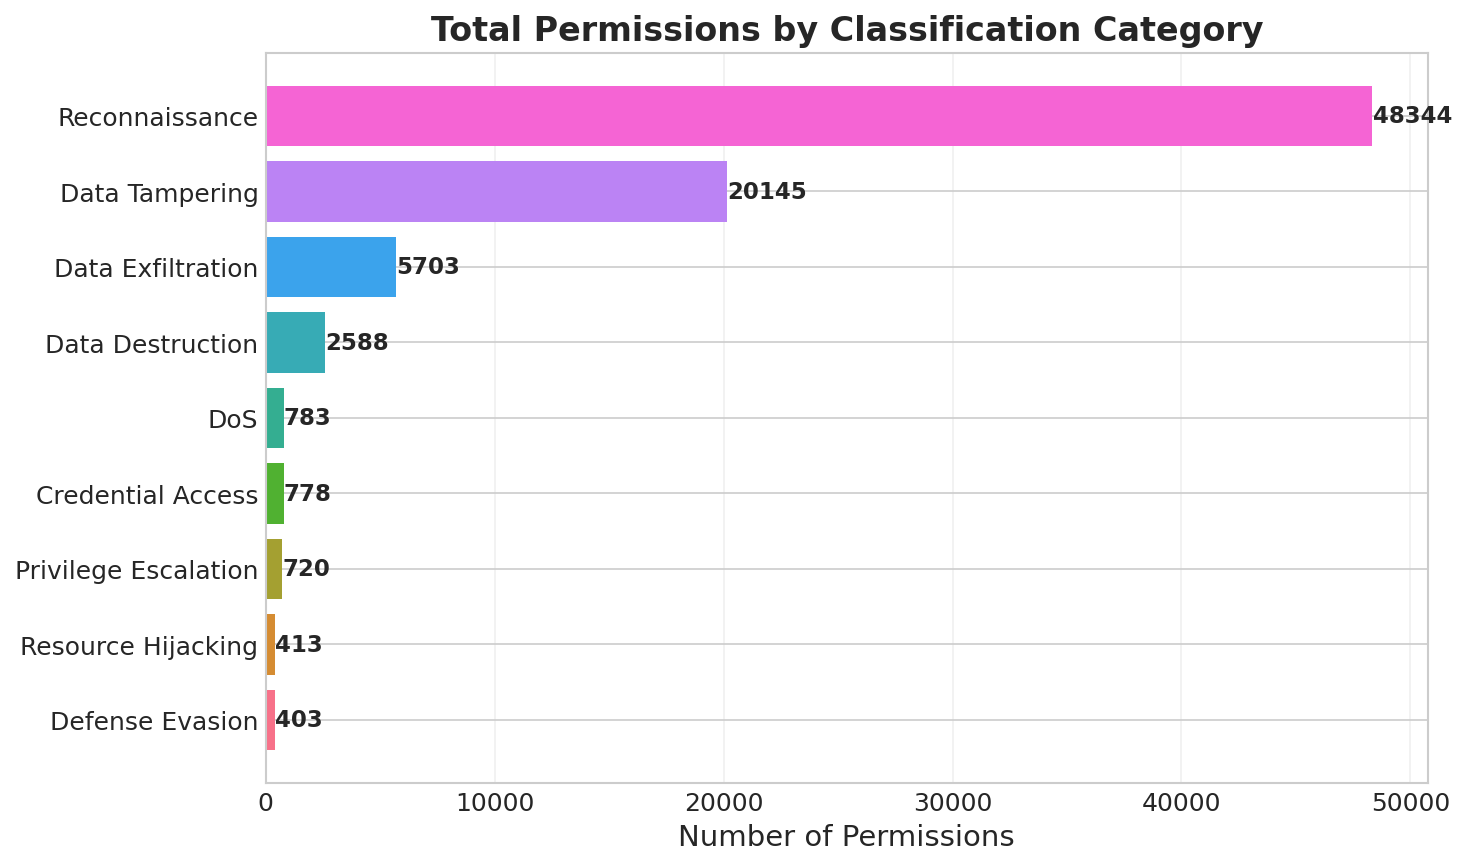

In [3]:
# Define classification columns (excluding 'Other')
classification_cols = ['Reconnaissance', 'Data Exfiltration', 'Credential Access', 
                       'Privilege Escalation', 'Data Tampering', 'Data Destruction', 
                       'DoS', 'Resource Hijacking', 'Defense Evasion']

# Sum of each classification
classification_totals = df[classification_cols].sum().sort_values(ascending=True)

# Generate color palette
colors = sns.color_palette('husl', len(classification_cols))

# Chart 1: Horizontal Bar Chart
plt.figure(figsize=(10, 6))
bars = plt.barh(classification_totals.index, classification_totals.values, color=colors)
plt.xlabel('Number of Permissions', fontsize=14)
plt.ylabel('')
plt.title('Total Permissions by Classification Category', fontsize=16, fontweight='bold')
plt.tick_params(axis='both', labelsize=12)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(classification_totals.values):
    plt.text(v + 10, i, str(v), va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## 2. Permissions per Application Distribution

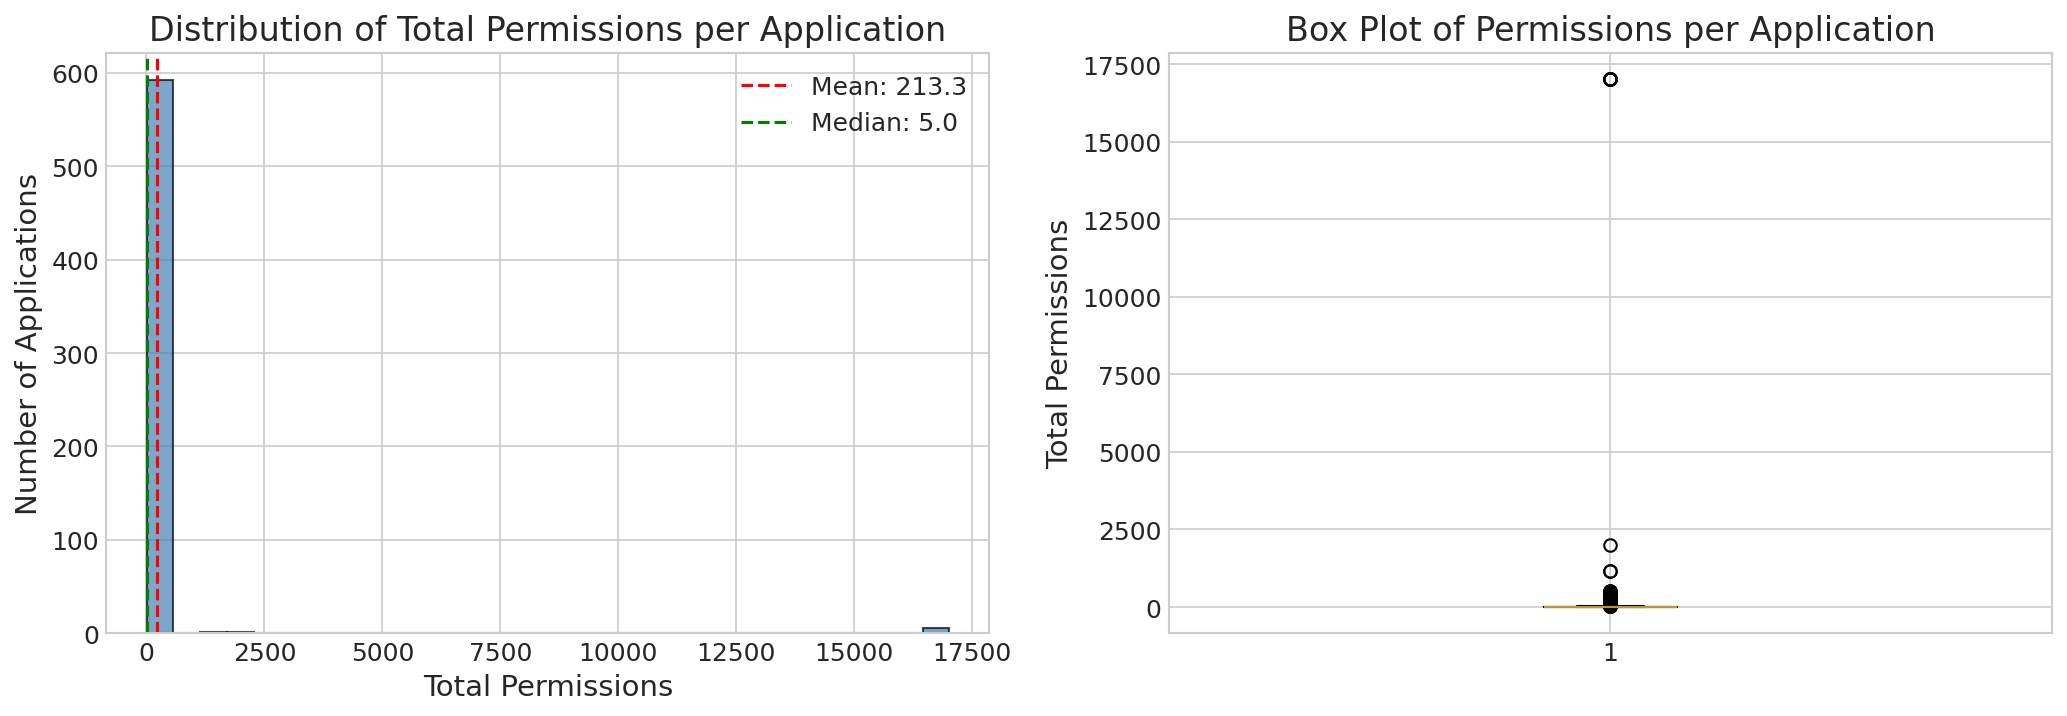


Permissions Statistics:
  Min: 1
  Max: 17020
  Mean: 213.26
  Median: 5.00
  Std Dev: 1694.00


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['total_permissions'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(df['total_permissions'].mean(), color='red', linestyle='--', label=f'Mean: {df["total_permissions"].mean():.1f}')
axes[0].axvline(df['total_permissions'].median(), color='green', linestyle='--', label=f'Median: {df["total_permissions"].median():.1f}')
axes[0].set_xlabel('Total Permissions', fontsize=14)
axes[0].set_ylabel('Number of Applications', fontsize=14)
axes[0].set_title('Distribution of Total Permissions per Application', fontsize=16)
axes[0].tick_params(axis='both', labelsize=12)
axes[0].legend(fontsize=12)

# Box plot
axes[1].boxplot(df['total_permissions'], vert=True)
axes[1].set_ylabel('Total Permissions', fontsize=14)
axes[1].set_title('Box Plot of Permissions per Application', fontsize=16)
axes[1].tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

print(f"\nPermissions Statistics:")
print(f"  Min: {df['total_permissions'].min()}")
print(f"  Max: {df['total_permissions'].max()}")
print(f"  Mean: {df['total_permissions'].mean():.2f}")
print(f"  Median: {df['total_permissions'].median():.2f}")
print(f"  Std Dev: {df['total_permissions'].std():.2f}")

## 3. Classification Category Distributions (Box Plots)

/tmp/ipykernel_3928489/2104345977.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(classification_data, labels=classification_cols, patch_artist=True)


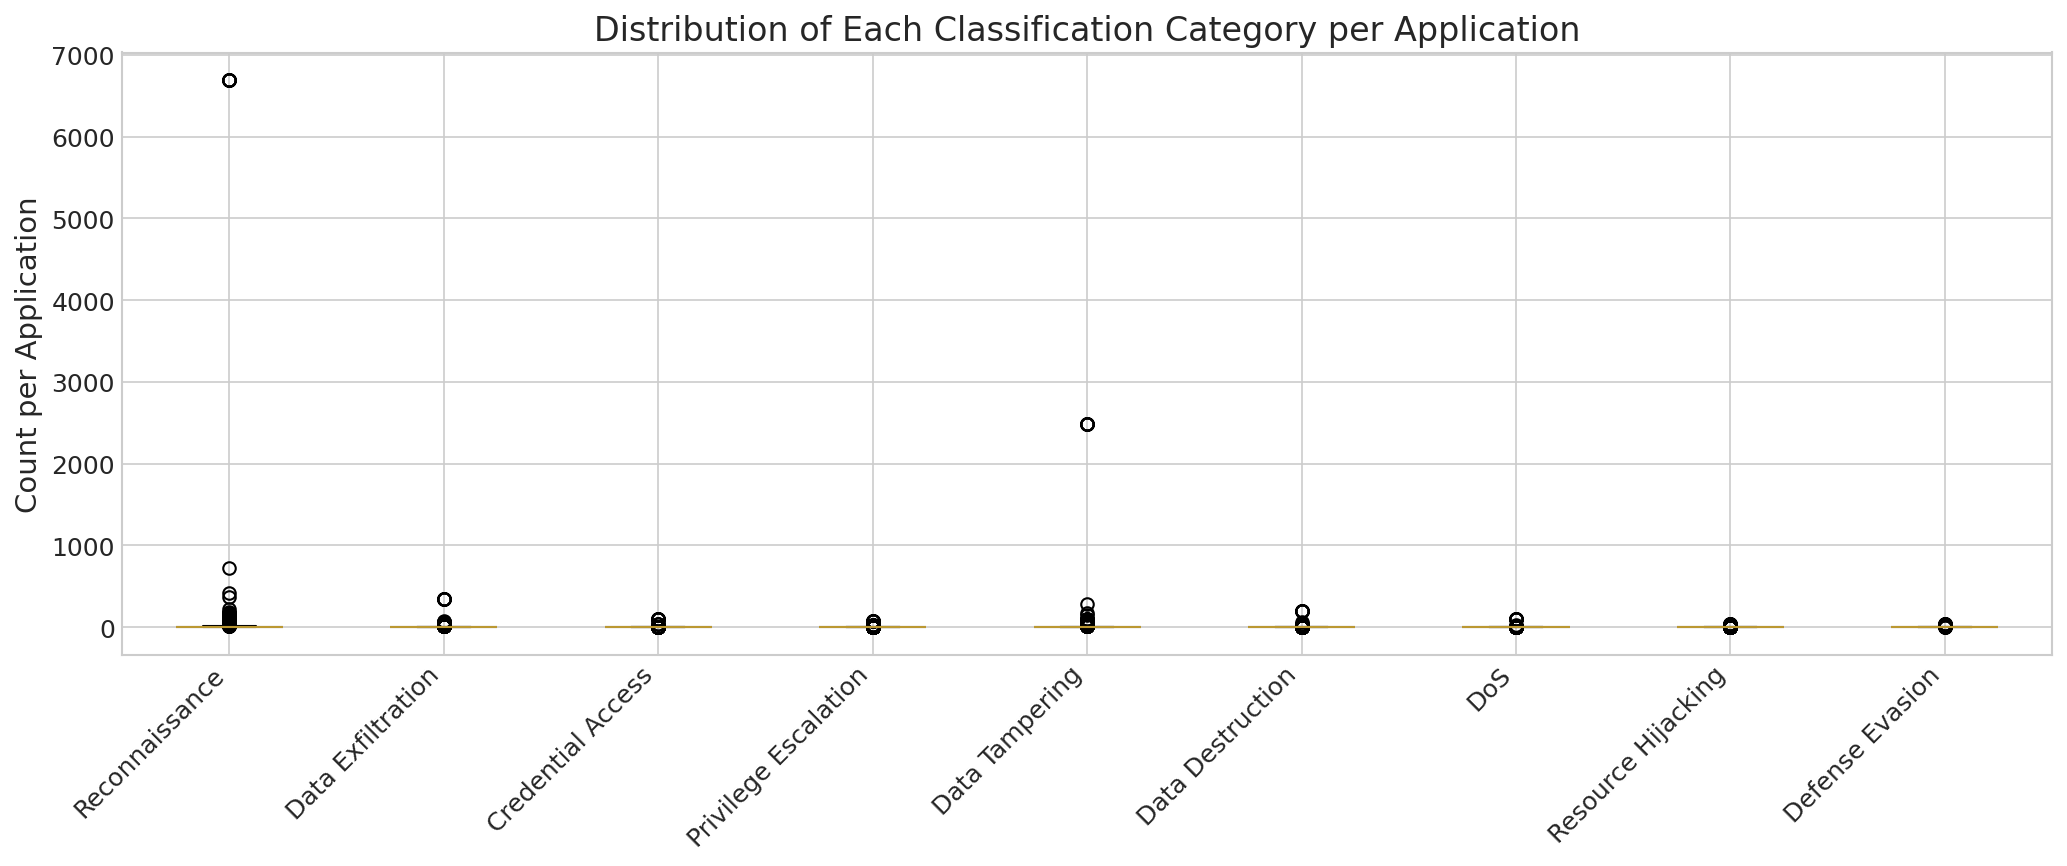

In [5]:
fig, ax = plt.subplots(figsize=(14, 6))

# Create box plot for each classification
classification_data = [df[col].values for col in classification_cols]
bp = ax.boxplot(classification_data, labels=classification_cols, patch_artist=True)

colors = sns.color_palette('husl', len(classification_cols))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_ylabel('Count per Application', fontsize=14)
ax.set_title('Distribution of Each Classification Category per Application', fontsize=16)
ax.tick_params(axis='both', labelsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. Correlation Analysis Between Classification Categories

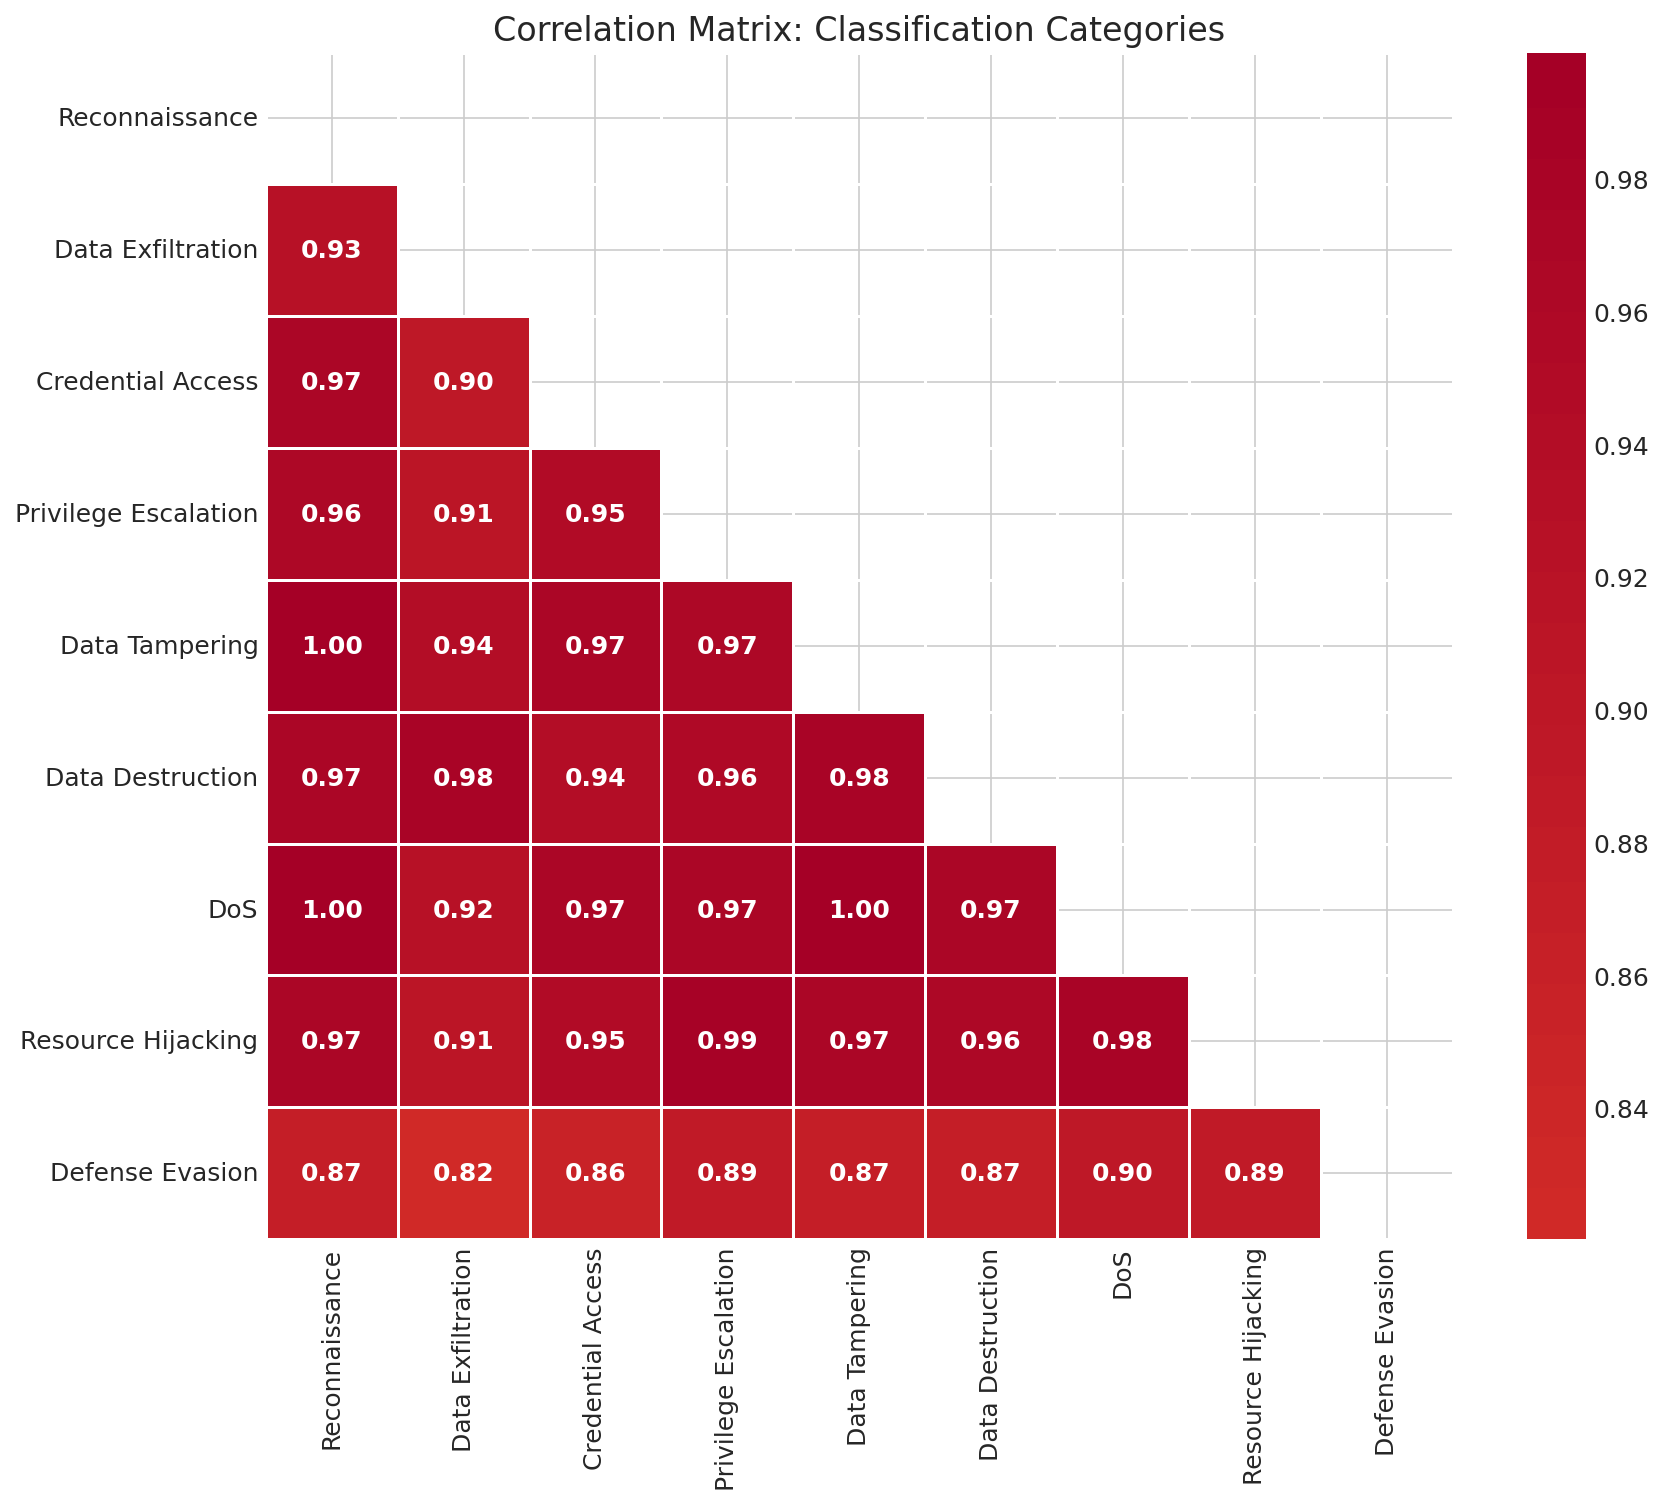


Top Positive Correlations (excluding self-correlations):
  Reconnaissance <-> Data Tampering: 0.999
  Reconnaissance <-> DoS: 0.997
  Data Tampering <-> DoS: 0.996
  Privilege Escalation <-> Resource Hijacking: 0.988
  DoS <-> Resource Hijacking: 0.981


In [6]:
# Correlation heatmap
corr_matrix = df[classification_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            fmt='.2f', square=True, linewidths=0.5, ax=ax,
            annot_kws={'size': 12, 'weight': 'bold'})
ax.set_title('Correlation Matrix: Classification Categories', fontsize=16)
ax.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()

# Find strongest correlations
print("\nTop Positive Correlations (excluding self-correlations):")
corr_pairs = []
for i in range(len(classification_cols)):
    for j in range(i+1, len(classification_cols)):
        corr_pairs.append((classification_cols[i], classification_cols[j], corr_matrix.iloc[i, j]))
corr_pairs.sort(key=lambda x: x[2], reverse=True)
for c1, c2, corr in corr_pairs[:5]:
    print(f"  {c1} <-> {c2}: {corr:.3f}")

## 5. Top Applications by Permission Count

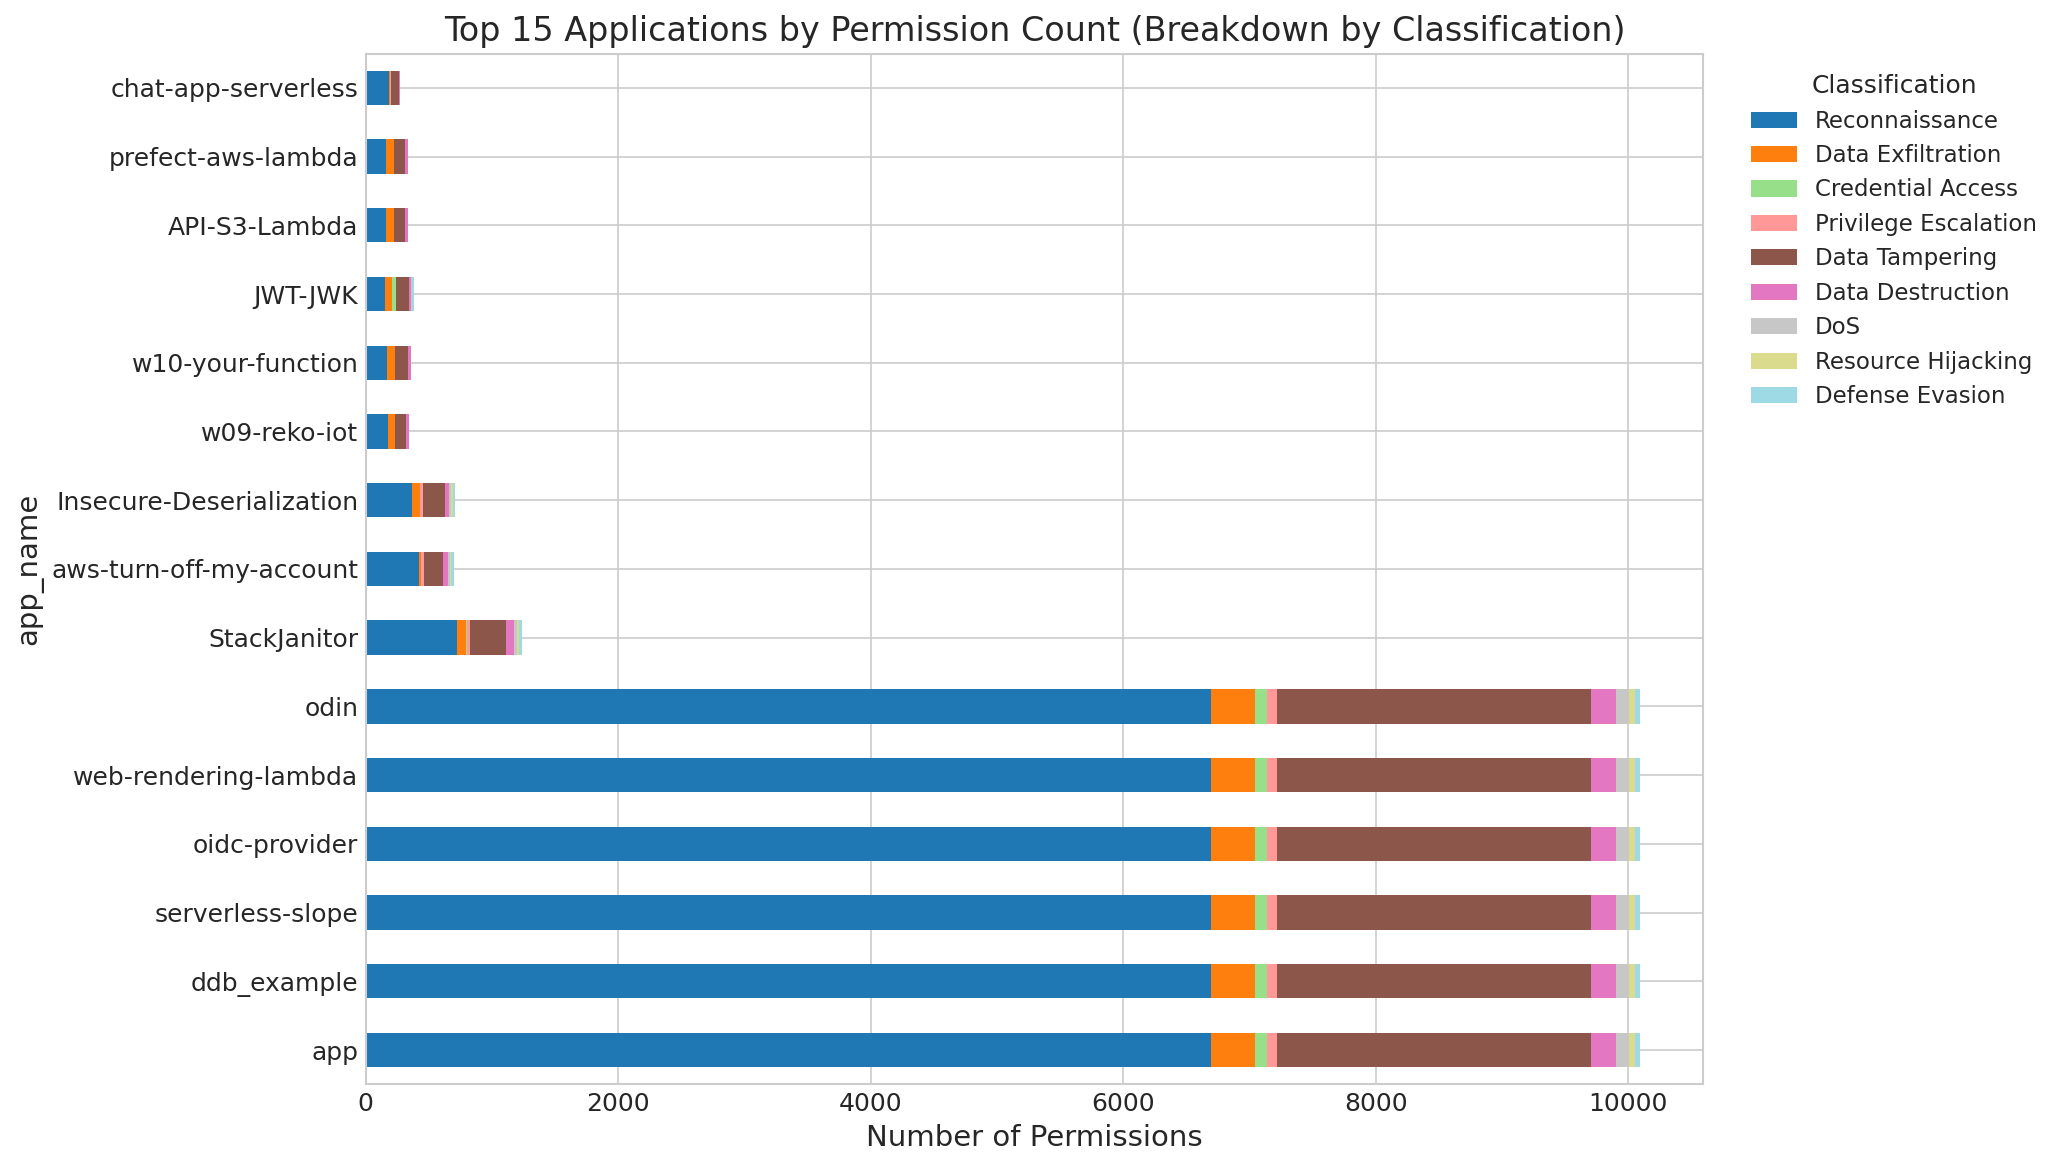


Top 15 Applications:
                app_name  total_permissions
                     app              17020
             ddb_example              17019
        serverless-slope              17019
           oidc-provider              17019
    web-rendering-lambda              17019
                    odin              17019
            StackJanitor               1986
 aws-turn-off-my-account               1162
Insecure-Deserialization               1149
            w09-reko-iot                528
       w10-your-function                514
                 JWT-JWK                489
           API-S3-Lambda                471
      prefect-aws-lambda                471
     chat-app-serverless                463


In [7]:
# Top 15 apps by total permissions
top_apps = df.nlargest(15, 'total_permissions')[['app_name', 'total_permissions'] + classification_cols]

fig, ax = plt.subplots(figsize=(14, 8))

# Stacked bar chart for top apps
top_apps_plot = top_apps.set_index('app_name')[classification_cols]
top_apps_plot.plot(kind='barh', stacked=True, ax=ax, colormap='tab20')

ax.set_xlabel('Number of Permissions', fontsize=14)
ax.set_title('Top 15 Applications by Permission Count (Breakdown by Classification)', fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax.legend(title='Classification', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.show()

print("\nTop 15 Applications:")
print(top_apps[['app_name', 'total_permissions']].to_string(index=False))

## 6. Applications with High-Risk Classifications

Analyzing applications with significant Credential Access, Privilege Escalation, or Defense Evasion permissions.

Applications with high-risk permissions: 162 (27.0%)


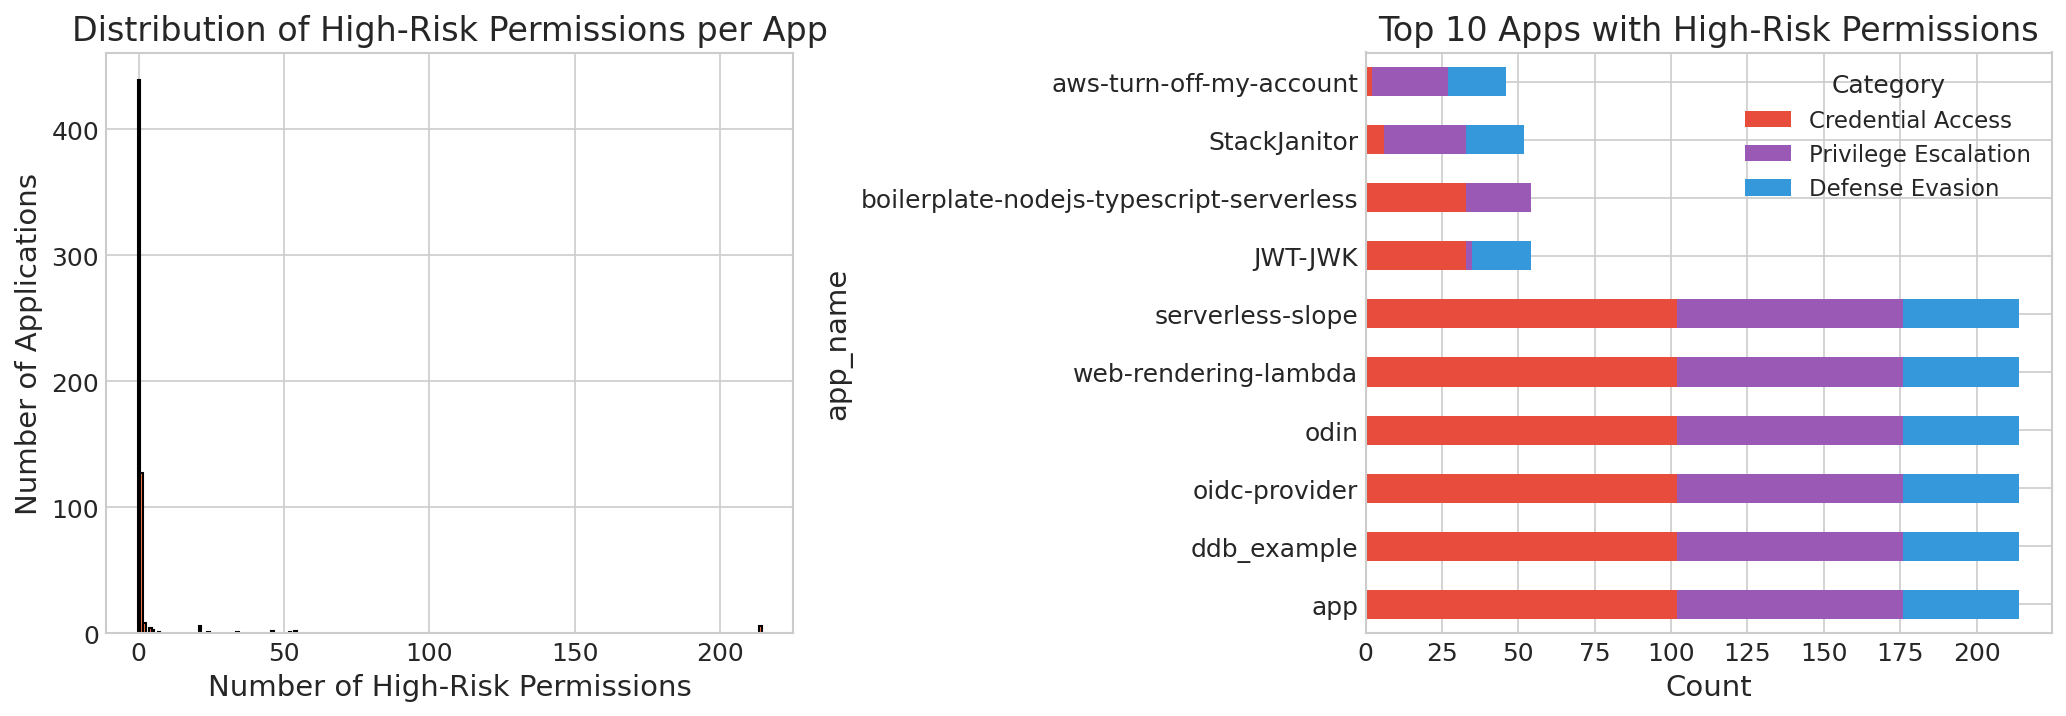

In [8]:
high_risk_cols = ['Credential Access', 'Privilege Escalation', 'Defense Evasion']


# Apps with any high-risk permissions
df['high_risk_total'] = df[high_risk_cols].sum(axis=1)
high_risk_apps = df[df['high_risk_total'] > 0].sort_values('high_risk_total', ascending=False)

print(f"Applications with high-risk permissions: {len(high_risk_apps)} ({len(high_risk_apps)/len(df)*100:.1f}%)")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of high-risk counts
high_risk_counts = df['high_risk_total'].value_counts().sort_index()
axes[0].bar(high_risk_counts.index, high_risk_counts.values, color='coral', edgecolor='black')
axes[0].set_xlabel('Number of High-Risk Permissions', fontsize=14)
axes[0].set_ylabel('Number of Applications', fontsize=14)
axes[0].set_title('Distribution of High-Risk Permissions per App', fontsize=16)
axes[0].tick_params(axis='both', labelsize=12)

# Top apps with high-risk permissions
if len(high_risk_apps) > 0:
    top_high_risk = high_risk_apps.head(10)[['app_name'] + high_risk_cols].set_index('app_name')
    top_high_risk.plot(kind='barh', stacked=True, ax=axes[1], color=['#e74c3c', '#9b59b6', '#3498db'])
    axes[1].set_xlabel('Count', fontsize=14)
    axes[1].set_title('Top 10 Apps with High-Risk Permissions', fontsize=16)
    axes[1].tick_params(axis='both', labelsize=12)
    axes[1].legend(title='Category', fontsize=11, title_fontsize=12)

plt.tight_layout()
plt.show()

## 7. Classification Prevalence Analysis

Percentage of applications having at least one permission in each category.

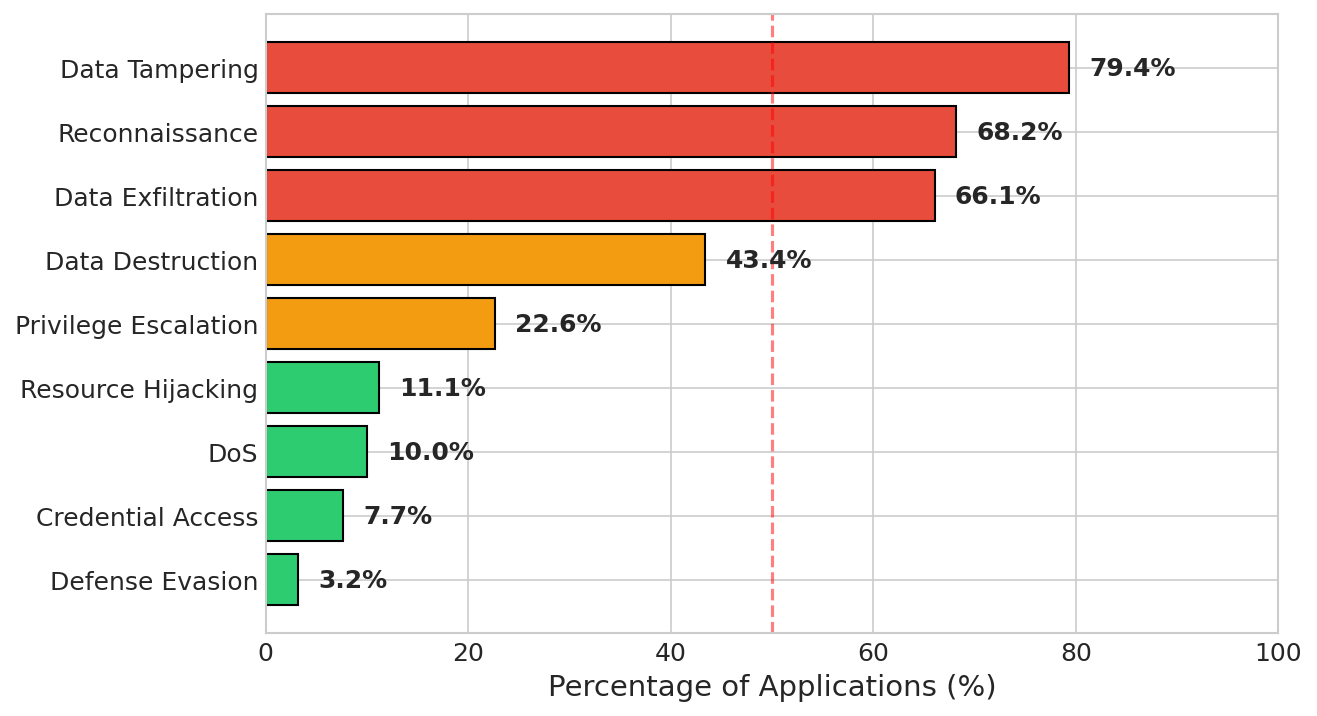


Abbreviation Legend:
  Reconnaissance = Reconnaissance: 68.2%
  Data Exfiltration = Data Exfiltration: 66.1%
  Credential Access = Credential Access: 7.7%
  Privilege Escalation = Privilege Escalation: 22.6%
  Data Tampering = Data Tampering: 79.4%
  Data Destruction = Data Destruction: 43.4%
  DoS  = DoS: 10.0%
  Resource Hijacking = Resource Hijacking: 11.1%
  Defense Evasion = Defense Evasion: 3.2%


In [15]:
# Calculate prevalence (% of apps with at least 1 permission in category)
prevalence = ((df[classification_cols] > 0).sum() / len(df) * 100).sort_values(ascending=True)

# Create abbreviation mapping
abbrev_map = {
    'Reconnaissance': 'Reconnaissance',
    'Data Exfiltration': 'Data Exfiltration',
    'Credential Access': 'Credential Access',
    'Privilege Escalation': 'Privilege Escalation',
    'Data Tampering': 'Data Tampering',
    'Data Destruction': 'Data Destruction',
    'DoS': 'DoS',
    'Resource Hijacking': 'Resource Hijacking',
    'Defense Evasion': 'Defense Evasion'
}

# Apply abbreviations
prevalence_abbrev = prevalence.rename(index=abbrev_map)

# More square figure with reduced width
fig, ax = plt.subplots(figsize=(9, 5))
colors = ['#2ecc71' if v < 20 else '#f39c12' if v < 50 else '#e74c3c' for v in prevalence_abbrev.values]
bars = ax.barh(prevalence_abbrev.index, prevalence_abbrev.values, color=colors, edgecolor='black')
ax.set_xlabel('Percentage of Applications (%)', fontsize=14)
ax.set_xlim(0, 100)  # Fixed x-axis to make bars proportional
ax.axvline(50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
ax.tick_params(axis='both', labelsize=12)

for i, v in enumerate(prevalence_abbrev.values):
    ax.text(v + 2, i, f'{v:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print legend for abbreviations
print("\nAbbreviation Legend:")
for full, abbr in abbrev_map.items():
    pct = prevalence.get(full, 0)
    print(f"  {abbr:4s} = {full}: {pct:.1f}%")

## 8. Permission Composition Analysis

How permissions are distributed within applications.

KeyError: 'Other'

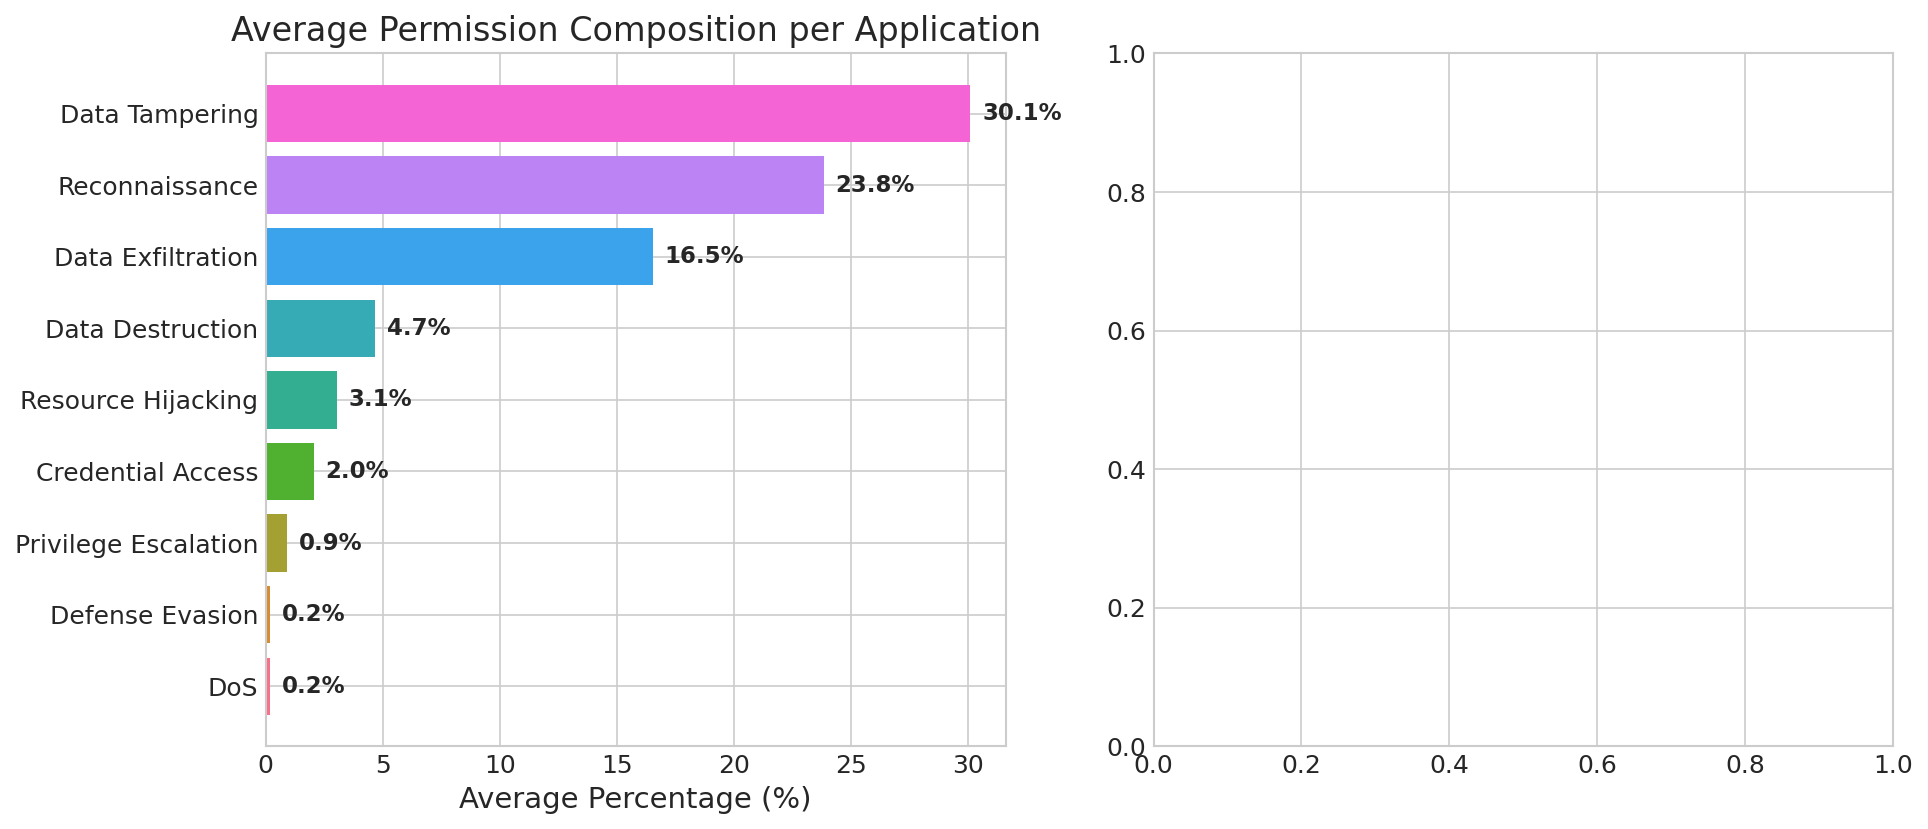

In [10]:
# Calculate percentage of each classification per app
df_pct = df[classification_cols].div(df['total_permissions'], axis=0) * 100
df_pct = df_pct.fillna(0)

# Average composition
avg_composition = df_pct.mean().sort_values(ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Average percentage composition
colors = sns.color_palette('husl', len(classification_cols))
axes[0].barh(avg_composition.index, avg_composition.values, color=colors)
axes[0].set_xlabel('Average Percentage (%)', fontsize=14)
axes[0].set_title('Average Permission Composition per Application', fontsize=16)
axes[0].tick_params(axis='both', labelsize=12)
for i, v in enumerate(avg_composition.values):
    axes[0].text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=11, fontweight='bold')

# Distribution of "Other" category percentage
axes[1].hist(df_pct['Other'], bins=20, edgecolor='black', alpha=0.7, color='gray')
axes[1].set_xlabel('Percentage of "Other" Classification', fontsize=14)
axes[1].set_ylabel('Number of Applications', fontsize=14)
axes[1].set_title('Distribution of "Other" Category Proportion', fontsize=16)
axes[1].tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

## 9. Cross-Analysis: Total Permissions vs Classification Patterns

In [ ]:
# Bin applications by total permissions
df['permission_tier'] = pd.cut(df['total_permissions'], 
                                bins=[0, 3, 7, 15, 50, df['total_permissions'].max()],
                                labels=['Very Low (1-3)', 'Low (4-7)', 'Medium (8-15)', 'High (16-50)', 'Very High (50+)'])

# Average classification composition by tier
tier_avg = df.groupby('permission_tier')[classification_cols].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap of average counts by tier
sns.heatmap(tier_avg.T, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[0],
            annot_kws={'size': 11, 'weight': 'bold'})
axes[0].set_title('Average Classification Count by Permission Tier', fontsize=16)
axes[0].set_xlabel('Permission Tier', fontsize=14)
axes[0].tick_params(axis='both', labelsize=11)

# Count of apps per tier
tier_counts = df['permission_tier'].value_counts().sort_index()
axes[1].bar(range(len(tier_counts)), tier_counts.values, tick_label=tier_counts.index, color='steelblue', edgecolor='black')
axes[1].set_xlabel('Permission Tier', fontsize=14)
axes[1].set_ylabel('Number of Applications', fontsize=14)
axes[1].set_title('Application Distribution by Permission Tier', fontsize=16)
axes[1].tick_params(axis='both', labelsize=11)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 10. Language/Framework Analysis (Based on Path)

In [ ]:
# Extract language from path
def extract_language(path):
    if '/python/' in path:
        return 'Python'
    elif '/javascript/' in path or '/js/' in path:
        return 'JavaScript'
    elif '/go/' in path or '/golang/' in path:
        return 'Go'
    elif '/typescript/' in path or '/ts/' in path:
        return 'TypeScript'
    else:
        return 'Other'

df['language'] = df['app_path'].apply(extract_language)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Apps per language
lang_counts = df['language'].value_counts()
wedges, texts, autotexts = axes[0].pie(lang_counts.values, labels=lang_counts.index, autopct='%1.1f%%', 
                                        colors=sns.color_palette('Set2'), textprops={'fontsize': 12})
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
axes[0].set_title('Applications by Language', fontsize=16)

# Average permissions by language
lang_avg = df.groupby('language')['total_permissions'].mean().sort_values(ascending=True)
axes[1].barh(lang_avg.index, lang_avg.values, color='steelblue', edgecolor='black')
axes[1].set_xlabel('Average Total Permissions', fontsize=14)
axes[1].set_title('Average Permissions per Application by Language', fontsize=16)
axes[1].tick_params(axis='both', labelsize=12)
for i, v in enumerate(lang_avg.values):
    axes[1].text(v + 0.2, i, f'{v:.1f}', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Classification breakdown by language
print("\nAverage Classification by Language:")
print(df.groupby('language')[classification_cols].mean().round(2).to_string())

## 11. Classification Co-occurrence Analysis

In [ ]:
# Calculate co-occurrence (apps that have both categories)
binary_df = (df[classification_cols] > 0).astype(int)
cooccurrence = binary_df.T.dot(binary_df)

fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(cooccurrence, dtype=bool))
sns.heatmap(cooccurrence, mask=mask, annot=True, fmt='d', cmap='Blues', ax=ax,
            annot_kws={'size': 12, 'weight': 'bold'})
ax.set_title('Co-occurrence Matrix: Number of Apps with Both Categories', fontsize=16)
ax.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()

# Diagonal shows count of apps with each category
print("\nApps with each category:")
for i, col in enumerate(classification_cols):
    print(f"  {col}: {cooccurrence.iloc[i, i]} apps")

## 12. Summary Statistics

In [ ]:
print("=" * 60)
print("PERMISSION CLASSIFICATION SUMMARY")
print("=" * 60)
print(f"\nTotal Applications Analyzed: {len(df)}")
print(f"Total Permissions: {df['total_permissions'].sum()}")
print(f"Average Permissions per App: {df['total_permissions'].mean():.2f}")

print("\n" + "-" * 60)
print("Classification Totals:")
print("-" * 60)
for col in classification_cols:
    total = df[col].sum()
    pct = total / df['total_permissions'].sum() * 100
    apps_with = (df[col] > 0).sum()
    print(f"  {col:22s}: {total:5d} ({pct:5.1f}%) - in {apps_with} apps")

print("\n" + "-" * 60)
print("High-Risk Permission Summary:")
print("-" * 60)
high_risk_total = df[high_risk_cols].sum().sum()
print(f"  Total high-risk permissions: {high_risk_total}")
print(f"  Percentage of all permissions: {high_risk_total / df['total_permissions'].sum() * 100:.1f}%")
print(f"  Apps with high-risk permissions: {len(high_risk_apps)} ({len(high_risk_apps)/len(df)*100:.1f}%)")